# Reinforcement Learning: An Introduction

### Exercise 2.8

k armed bandit problem trying to comapre different methods for tracking nonstationary problems.

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt


### Define Actors

In [2]:
# Bandit
def Bandit(arm, B):
    B += np.random.normal(0, 0.01, 10)
    return B[arm]

In [3]:
# UCB.
def UCB(Q, N, t, c):
    # Prevent division by zero.
    N_temp = np.clip(N, 0.0000001, None)
    
    A = Q + c*np.sqrt(np.log(t)/N_temp)
    return np.argmax(A)

In [4]:
# Gradient Bandit.
def GradientBandit(Q):
    e_Q = np.exp(Q)
    P_a = e_Q / np.sum(e_Q)
    return np.random.choice(k, p=P_a)

In [5]:
# Epsilon Greedy.
def EpsilonGreedy(Q, epsilon):
    if np.random.rand(1) > epsilon:
        # Exploit
        return np.argmax(Q)
    else:
        # Explore
        return np.random.choice(k)

In [6]:
# Greedy with optimistic Q_0 is just EpsilonGreedy with different Initial Q values.
def OptimisticInit(Q, Q_0):
    Q += Q_0
    return Q

### Run Simulation

In [17]:
# Setup.
start = time.time()
#np.random.seed(14)
B = np.random.normal(0,1,10)


k = 10

alpha = 0.1
epsilon = 0.0

epochs = 20
runs = 200000

total_rewards = []
x_list = []

i = 0
for x in range(-2, 3):
    epoch_rewards = 0
    #epsilon = 2**x
    #alpha = 2**x
    #c = 2**x
    Q_0 = 2**x
    for e in range(epochs):
        run_rewards = 0
        Q = np.zeros(k)
        N = np.zeros(k, dtype=np.int32)
        B = np.random.normal(0,1,10)
        Q = OptimisticInit(Q, Q_0)
        for t in range(1, runs+1):
            a = EpsilonGreedy(Q, epsilon)
            #a = GradientBandit(Q)
            #a = UCB(Q, N, t, c)
            N[a] += 1
            r = Bandit(a, B)
            Q[a] = Q[a] + alpha* (r - Q[a])
            # Only save last 100,000
            if t > 100000: run_rewards += r
        if e % 2 == 0: print("\b",int(e/2), sep='',end='')
        epoch_rewards += run_rewards/(runs/2)
    total_rewards.append(epoch_rewards/(epochs))
    x_list.append(x)
    print("\bX", end=' ')
print("")


np.set_printoptions(precision=3)
print(np.array([total_rewards, x_list]))

#epsilon_greedy = np.array([total_rewards, x_list])
#gradient_bandit = np.array([total_rewards, x_list])
#ucb = np.array([total_rewards, x_list])
optimistic_initial = np.array([total_rewards, x_list])

end = time.time()
print("Run time (min)", round((end - start)/60,1))

XXXXX 
[[ 4.23   4.438  5.174  4.756  5.352]
 [-2.    -1.     0.     1.     2.   ]]
Run time (min) 4.4


In [227]:
i = -7
for x in range(-7, 3):
    print(i, 2**x)
    i += 1

-7 0.0078125
-6 0.015625
-5 0.03125
-4 0.0625
-3 0.125
-2 0.25
-1 0.5
0 1
1 2
2 4


## Replicate figure 2.6
#### Epsilon Greedy
[[ 0.694  0.867  0.966  0.979  0.981  0.928]
 [-7.    -6.    -5.    -4.    -3.    -2.   ]]
 
#### Gradient Bandit
[[ 0.496  0.57   0.614  0.641  0.652  0.661  0.52 ]
 [-5.    -4.    -3.    -2.    -1.     0.     1.   ]]

#### UCB
[[ 1.359  1.359  1.359  1.358  1.312  1.198  0.961]
 [-4.    -3.    -2.    -1.     0.     1.     2.   ]]
 
#### Optimistic Initialization
[[ 0.042  0.042  0.042  0.819  0.819  0.819  0.819  1.11   1.326  1.242]
 [-7.    -6.    -5.    -4.    -3.    -2.    -1.     0.     1.     2.   ]]

## Exercise 2.8
#### Epsilon Greedy
[[ 6.647  8.365  6.695  5.183  5.488  5.425]
 [-7.    -6.    -5.    -4.    -3.    -2.   ]]

[[ 6.315  6.266  5.409  6.223  3.8    4.266]
 [-7.    -6.    -5.    -4.    -3.    -2.   ]]
 
[[ 5.967  5.529  5.256  5.181  5.25   4.734]
 [-7.    -6.    -5.    -4.    -3.    -2.   ]]

[[ 5.84   6.548  6.587  5.566  5.491  3.909]
 [-7.    -6.    -5.    -4.    -3.    -2.   ]]
 
Final 
[[ 5.731  6.572  5.655  6.793  4.782  4.609]
 [-7.    -6.    -5.    -4.    -3.    -2.   ]]

 
#### Gradient Bandit
[[ 5.43   6.521  4.943]
 [-5.    -4.    -3.   ]]
 
 [[ 5.792  5.2    6.176  4.045]
 [-2.    -1.     0.     1.   ]]


#### UCB
[[ 4.648  4.627  4.679  5.083  5.131  5.45   5.705]
 [-4.    -3.    -2.    -1.     0.     1.     2.   ]]

#### Optimistic Initialization
[[ 4.276  3.625  4.857  4.233  4.46 ]
 [-2.    -1.     0.     1.     2.   ]]

In [20]:
# Insert Data
epsilon_greedy = np.array([[ 5.731, 6.572, 5.655, 6.793, 4.782, 4.609], [-7., -6., -5., -4., -3., -2. ]])
gradient_bandit = np.array([[ 5.792, 5.2, 6.176, 4.045], [-2., -1., 0., 1. ]])
ucb = np.array([[ 4.648, 4.627, 4.679, 5.083, 5.131, 5.45, 5.705], [-4., -3., -2., -1., 0., 1., 2. ]])
optimistic_initial = np.array([[4.276, 3.625, 4.857, 4.233, 4.46 ],[-2., -1., 0., 1., 2. ]])


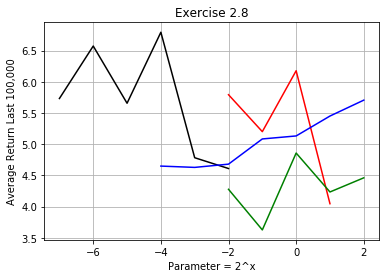

In [32]:
# Exercise 2.8

plt.plot(epsilon_greedy[1], epsilon_greedy[0], 'k')
plt.plot(gradient_bandit[1], gradient_bandit[0], 'r')
plt.plot(ucb[1], ucb[0], 'b')
plt.plot(optimistic_initial[1], optimistic_initial[0], 'g')

plt.xlabel('Parameter = 2^x')
plt.ylabel('Average Return Last 100,000')
plt.title('Exercise 2.8')
plt.grid(True)
plt.savefig("exercise28.png")
plt.show()

In [8]:
x = np.arange(-7,3)

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2])

In [23]:
epsilon_greedy[0]

array([ 5.731,  6.572,  5.655,  6.793,  4.782,  4.609])